Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 97s 2ms/step - loss: 0.2623 - acc: 0.9184 - val_loss: 0.0567 - val_acc: 0.9821
Epoch 2/20
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0865 - acc: 0.9744 - val_loss: 0.0388 - val_acc: 0.9860
Epoch 3/20
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0651 - acc: 0.9804 - val_loss: 0.0342 - val_acc: 0.9875
Epoch 4/20
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0523 - acc: 0.9843 - val_loss: 0.0298 - val_acc: 0.9898
Epoch 5/20
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0464 - acc: 0.9865 - val_loss: 0.0286 - val_acc: 0.9902
Epoch 6/20
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0396 - acc: 0.9877 - val_loss: 0.0260 - val_acc: 0.9915
Epoch 7/20
60000/60000 [==============================]

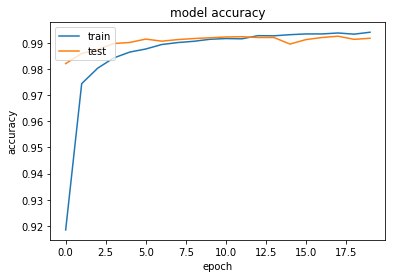

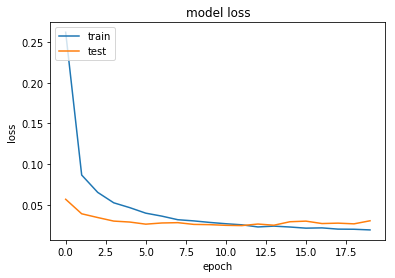

In [1]:
%matplotlib inline
'''
Artificial Intelligence and Expert Systems
Name: Shiv Shankar Sukumaran
Roll No: 14CO244
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28


'''
Used CPU: 6700HQ GPU: GTX965M
"epsilon": 1e-07,
"floatx": "float32",
"image_dim_ordering": "tf",
"backend": "tensorflow"
'''

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

'''Plotting the loss and accuracy on the graph'''

print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
